# Project 2

In [896]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [897]:
#import dataset
original_election_data = pd.read_csv("merged_train.csv")
#original_election_data.head()
#original_election_data.count()

In [898]:
#import dataset
test_data = pd.read_csv("demographics_test.csv")
#test_data.head()

In [899]:
demo_data = original_election_data[original_election_data['Party'] == 1]
repub_data = original_election_data[original_election_data['Party'] != 1]

### Task 1 : Partition dataset into training and validation sets 

In [900]:
#using Holdout method
demo_x_train, demo_x_val, demo_y_train, demo_y_val = train_test_split(demo_data.iloc[:,:-3], demo_data['Democratic'], test_size = 0.25, random_state=0)
repub_x_train, repub_x_val, repub_y_train, repub_y_val = train_test_split(repub_data.iloc[:,:-3], repub_data['Republican'], test_size = 0.25, random_state=0)
#demo_x_train.head()
#repub_x_train.iloc[:,3:]

In [901]:
x_train, x_val, y_train, y_val = train_test_split(original_election_data.iloc[:,:-3], original_election_data['Party'], test_size = 0.25, random_state=0)
x_train.count()

State                                    896
County                                   896
FIPS                                     896
Total Population                         896
Percent White, not Hispanic or Latino    896
Percent Black, not Hispanic or Latino    896
Percent Hispanic or Latino               896
Percent Foreign Born                     896
Percent Female                           896
Percent Age 29 and Under                 896
Percent Age 65 and Older                 896
Median Household Income                  896
Percent Unemployed                       896
Percent Less than High School Degree     896
Percent Less than Bachelor's Degree      896
Percent Rural                            896
dtype: int64

In [902]:
data_x = original_election_data.iloc[:,:-3]
#x_train.head()
data_y = original_election_data['Party']
#y_train

### Task 2 : Standardizing training and validation sets

In [903]:
scaler = StandardScaler()
scaler.fit(demo_x_train.iloc[:,3:])
demo_x_train_scaled = scaler.transform(demo_x_train.iloc[:,3:])
demo_x_train_scaled = pd.DataFrame(demo_x_train_scaled)
demo_x_val_scaled = scaler.transform(demo_x_val.iloc[:,3:])
demo_x_val_scaled = pd.DataFrame(demo_x_val_scaled)
#demo_x_train_scaled

In [904]:
scaler = StandardScaler()
scaler.fit(repub_x_train.iloc[:,3:])
repub_x_train_scaled = scaler.transform(repub_x_train.iloc[:,3:])
repub_x_train_scaled = pd.DataFrame(repub_x_train_scaled)
repub_x_val_scaled = scaler.transform(repub_x_val.iloc[:,3:])
repub_x_val_scaled = pd.DataFrame(repub_x_val_scaled)

In [905]:
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,3:])
x_train_scaled = scaler.transform(x_train.iloc[:,3:])
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val.iloc[:,3:])
x_val_scaled = pd.DataFrame(x_val_scaled)

In [906]:
scaler = StandardScaler()
scaler.fit(data_x.iloc[:,3:])
data_x_scaled = scaler.transform(data_x.iloc[:,3:])
data_x_scaled = pd.DataFrame(data_x_scaled)

In [907]:
scaler = StandardScaler()
scaler.fit(test_data.iloc[:,3:])
test_data_scaled = scaler.transform(test_data.iloc[:,3:])
test_data_scaled = pd.DataFrame(test_data_scaled)

### Task 3 : Build Linear Regression Model

#### For Democratic Party

In [425]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[105741.91890292  -7031.28797487   -945.29697906  -9221.09275689
   3865.44004217   -134.00141223 -11055.88005376  -5330.51704405
  -2491.95355306   1856.59733563   3747.47360309 -18201.54719527
  -1197.67895929]
73105.48898678414


In [426]:
predicted = fitted_model.predict(demo_x_val_scaled)
print(predicted[:20])

[ 39101.26684705   1957.05445949   3215.02004267  -8498.54521541
 185541.37970331  87816.43262321  28910.1604136   59138.1950214
  63239.90117786  27599.13010996  12216.54395254 216158.68759364
   9699.91366015  13984.73290653  20885.08911647 214339.08433885
  -4177.20344313 -15541.85150086   5218.44985097   3315.5014316 ]


In [427]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.8973625770302538
0.8052595946543781
0.777766831546761


In [428]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled, y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.7954782367588812
0.7666045760660174


In [18]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43373.8217794965
154265650092.28104
1881288415.7595248
43373.8217794965


#### Testing diffferent attributes

In [402]:
cols = [6,7,8,9,10,11]

In [403]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled.iloc[:,cols], y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[-43322.69734676 -49970.46630587  -1677.51479903  13298.08899082
  20855.39043928 -57164.76480477]
67233.13168724277


In [404]:
predicted = fitted_model.predict(demo_x_val_scaled.iloc[:, cols])

In [405]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:, cols].columns-1))
print(adj_R_squared)

0.4897732394781385
0.23987782610891
0.18986978835291735


In [103]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled.iloc[:,cols], y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:,cols].columns)-1)
print(adj_R_squared)

0.28959644416308383
0.2223961078001323


In [108]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
predicted = fitted_model.predict(demo_x_val_scaled)
print(fitted_model.coef_)
corr_coef = np.corrcoef(predicted, demo_y_val)[1, 0]
print(corr_coef)
R_squared = corr_coef**2
print(R_squared)

[ 60318.98120639  -1908.57695683   2771.30170185  -1539.49712625
  13044.70003014   2477.39222874  -5129.16528465  -3607.78418101
   3799.75940823   2473.05511638   -687.70635787 -10084.86381959
  -9512.70085209]
0.9421094398066846
0.8875701965728651


In [107]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43142.59227696904
152625228006.89664
1861283268.3767886
43142.59227696904


In [219]:
#demo_x_train_scaled.head()

In [386]:
demo_x_train.iloc[:,3:].mean()

Total Population                         274659.238683
Percent White, not Hispanic or Latino        70.684327
Percent Black, not Hispanic or Latino         9.557471
Percent Hispanic or Latino                   10.632678
Percent Foreign Born                          7.199469
Percent Female                               50.398727
Percent Age 29 and Under                     38.759771
Percent Age 65 and Older                     16.271177
Median Household Income                   53588.407407
Percent Unemployed                            6.863873
Percent Less than High School Degree         11.679167
Percent Less than Bachelor's Degree          72.279062
Percent Rural                                37.611821
dtype: float64

#### For Republic Party

In [414]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = repub_x_train_scaled, y = repub_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[20959.79427444  1073.48906332    26.5507054    519.20511435
   160.1325564   -219.55535432  -795.00206857  1142.94276452
  1519.76548773   409.04285069   625.62619945  -589.5266056
  -282.89398987]
12655.983128834358


In [415]:
predicted = fitted_model.predict(repub_x_val_scaled)
print(predicted[:5])

[10845.75805198 24983.35644565 35797.76474502  2213.69567533
  1113.58400542]


In [21]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.9827560742690562
0.9658095015127267
0.9638081064793254


In [22]:
R_squared_ = fitted_model.score(X = repub_x_val_scaled, y = repub_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.956582314849456
0.9540407918162535


In [23]:
rms = m.sqrt(mean_squared_error(repub_y_val, predicted))
print(rms)

5032.5002019522135


### Task 4 : Build Classification Model

#### k Nearest

In [861]:
classifier = KNeighborsClassifier(n_neighbors = 11, weights ='distance')  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [862]:
y_pred = classifier.predict(x_val_scaled)

[[211  11]
 [ 42  35]]


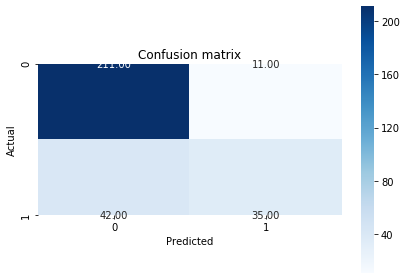

In [863]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [864]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.822742474916388, 0.17725752508361203, array([0.83399209, 0.76086957]), array([0.95045045, 0.45454545]), array([0.88842105, 0.56910569])]


In [916]:
cols = [3,5,6,7,8,9,11,12]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled.iloc[:,cols],y_train)
    y_pred = classifier.predict(x_val_scaled.iloc[:,cols])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])


[1, 0.7692307692307693, 0.23076923076923073, array([0.83406114, 0.55714286]), array([0.86036036, 0.50649351]), array([0.84700665, 0.53061224])]
[2, 0.7692307692307693, 0.23076923076923073, array([0.83406114, 0.55714286]), array([0.86036036, 0.50649351]), array([0.84700665, 0.53061224])]
[3, 0.8193979933110368, 0.1806020066889632, array([0.836     , 0.73469388]), array([0.94144144, 0.46753247]), array([0.88559322, 0.57142857])]
[4, 0.802675585284281, 0.19732441471571904, array([0.83265306, 0.66666667]), array([0.91891892, 0.46753247]), array([0.87366167, 0.54961832])]
[5, 0.8093645484949833, 0.1906354515050167, array([0.83673469, 0.68518519]), array([0.92342342, 0.48051948]), array([0.87794433, 0.5648855 ])]
[6, 0.8160535117056856, 0.18394648829431437, array([0.83805668, 0.71153846]), array([0.93243243, 0.48051948]), array([0.88272921, 0.57364341])]
[7, 0.8260869565217391, 0.17391304347826086, array([0.84274194, 0.74509804]), array([0.94144144, 0.49350649]), array([0.8893617, 0.59375  ]

#### Testing different attributes

In [887]:
cols = [3,5,6,7,8,9,11,12]

In [888]:
classifier = KNeighborsClassifier(n_neighbors = 11)  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [889]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [890]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8461538461538461, 0.15384615384615385, array([0.84920635, 0.82978723]), array([0.96396396, 0.50649351]), array([0.90295359, 0.62903226])]


[[212  10]
 [ 36  41]]


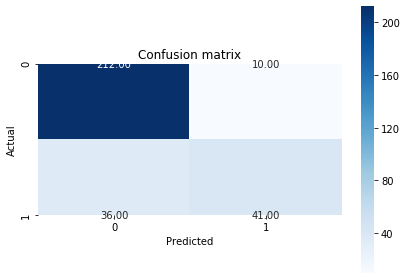

In [526]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

#### SVM

In [410]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [411]:
y_pred = classifier.predict(x_val_scaled)

[[216   6]
 [ 37  40]]


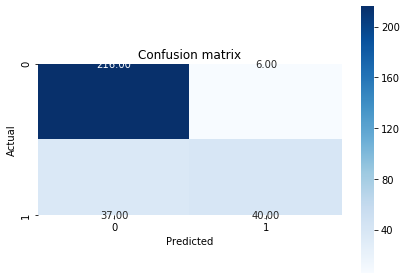

In [412]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [413]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85375494, 0.86956522]), array([0.97297297, 0.51948052]), array([0.90947368, 0.6504065 ])]


#### Testing different attributes

In [773]:
cols = [2,3,6,7,8,9,11,12]

In [774]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [775]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [776]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85943775, 0.84      ]), array([0.96396396, 0.54545455]), array([0.90870488, 0.66141732])]


[[210  12]
 [ 44  33]]


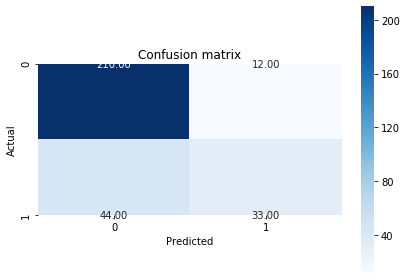

In [706]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

## Task 4 : Build Clustering model

### K Means

In [917]:
clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled)
clusters = clustering.labels_
len(clusters)

1195

In [918]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled,clusters)
print([adjusted_rand_index, silhouette_coefficient])

[0.19751656022671712, 0.30700290833697047]


[[709 150]
 [161 175]]


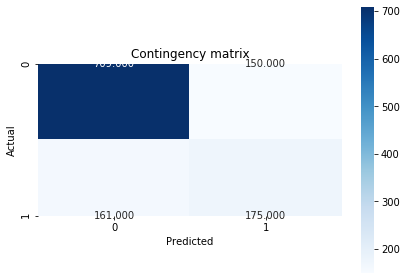

In [920]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

### DBSCAN